In [152]:
# Libraries for data collection, manipulation, and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Read in the restructured df_economy dataframe from github

In [153]:
df_economy = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Projects/refs/heads/main/df_economy.csv')

##### Create a poverty dataframe - reviewing only records with the target variable %pov

In [154]:
# Create separate poverty dataframe
df_pov = df_economy.dropna(subset=['%pov'])
df_pov = df_pov.drop('gdp', axis=1)
df_pov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 5 to 4425
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1003 non-null   object 
 1   region                       1003 non-null   object 
 2   un_region                    1003 non-null   object 
 3   year                         1003 non-null   int64  
 4   %pov                         1003 non-null   float64
 5   cpia_regulation              748 non-null    float64
 6   cpia_gender                  748 non-null    float64
 7   cpia_resources               748 non-null    float64
 8   cpia_transparency            748 non-null    float64
 9   cpia_inclusion               748 non-null    float64
 10  cpia_trade                   748 non-null    float64
 11  healthcare$                  310 non-null    float64
 12  education$                   346 non-null    float64
 13  coll_enrollment   

##### Review % of missing data in poverty dataframe where you consider the number of features per row with missing data

In [155]:
'''
Review missing values in df_pov when all but 3, 4, 5, 6, etc features are missing to determine missing data approach
'''
colsP = df_pov[['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency','cpia_inclusion','healthcare$', 'education$', 
                'coll_enrollment', 'income_middle60%', 'comm_import_capita', 'comm_export_capita']]
# Identify and count rows with all but 3 features missing values
three_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 3)
three_features_count = three_features_with_data.sum()


# Identify and count rows with all but 4 features misssing
four_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 4)
four_features_count = four_features_with_data.sum()

# Identify and count rows with all but 5 features misssing
five_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 5)
five_features_count = five_features_with_data.sum()

# Identify and count rows with all but 5 features misssing
five_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 5)
five_features_count = five_features_with_data.sum()

# Identify and count rows with all but 6 features misssing
six_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 6)
six_features_count = six_features_with_data.sum()

# Identify and count rows with all but 7 features misssing
seven_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 7)
seven_features_count = seven_features_with_data.sum()

# Identify and count rows with all but 8 features misssing
eight_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 8)
eight_features_count = eight_features_with_data.sum()

# Identify and count rows with all but 7 features misssing
nine_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 9)
nine_features_count = nine_features_with_data.sum()


# Identify and count rows with all but 10 features misssing
ten_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 10)
ten_features_count = ten_features_with_data.sum()

# Drop rows with so that df has more than x number of features with data
df_pov3 = df_pov[~three_features_with_data]
df_pov4 = df_pov[~four_features_with_data]
df_pov5 = df_pov[~five_features_with_data]
df_pov6 = df_pov[~six_features_with_data]
df_pov7 = df_pov[~seven_features_with_data]
df_pov8 = df_pov[~eight_features_with_data]
df_pov9 = df_pov[~nine_features_with_data]
df_pov10 = df_pov[~ten_features_with_data]

# Calculate the percentage of nan values
nan_percentage_whole = df_pov.isna().sum().sum() / df_pov.size * 100
nan_percentage_three = df_pov3.isna().sum().sum() / df_pov3.size * 100
nan_percentage_four = df_pov4.isna().sum().sum() / df_pov4.size * 100
nan_percentage_five = df_pov5.isna().sum().sum() / df_pov5.size * 100
nan_percentage_six = df_pov6.isna().sum().sum() / df_pov6.size * 100
nan_percentage_seven = df_pov7.isna().sum().sum() / df_pov7.size * 100
nan_percentage_eight = df_pov8.isna().sum().sum() / df_pov8.size * 100
nan_percentage_nine = df_pov9.isna().sum().sum() / df_pov9.size * 100
nan_percentage_ten = df_pov10.isna().sum().sum() / df_pov10.size * 100

##### Print results of missing data review (at various record reduction scenarios) for the poverty target variable

In [156]:
#df_pov = df_pov.dropna(subset=['coll_enrollment'])
# print missing variable summaries for df_pov
print('Percentage of missing values per variable in df_pov')
print(df_pov.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_whole}')
print(f'Number records in df_pov :{len(df_pov)}\n')

# print missing variable summaries for df_pov3
print('Percentage of data not missing in df_pov3 - More then 3 features per record present')
print(df_pov3.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_three}')
print(f'Number records in df_pov3 :{len(df_pov3)}\n')

# print missing variable summaries for df_pov4
print('Percentage of data not missing in df_pov4 - More then 4 features per record present')
print(df_pov4.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_four}')
print(f'Number records in df_pov4 :{len(df_pov4)}\n')

# print missing variable summaries for df_pov5
print('Percentage of data not missing in df_pov5 - More then 5 features per record present')
print(df_pov5.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_five}')
print(f'Number records in df_pov5 :{len(df_pov5)}\n')

# print missing variable summaries for df_pov6
print('Percentage of data not missing in df_pov6 - More then 6 features per record present')
print(df_pov6.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_six}')
print(f'Number records in df_pov6 :{len(df_pov6)}\n')

# print missing variable summaries for df_pov7
print('Percentage of data not missing in df_pov7 - More then 7 features per record present')
print(df_pov7.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_seven}')
print(f'Number records in df_pov7 :{len(df_pov7)}\n')

# print missing variable summaries for df_pov8
print('Percentage of data not missing in df_pov8 - More then 8 features per record present')
print(df_pov8.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_eight}')
print(f'Number records in df_pov8 :{len(df_pov8)}\n')

# print missing variable summaries for df_pov9
print('Percentage of data not missing in df_pov9 - More then 9 features per record present')
print(df_pov9.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_nine}')
print(f'Number records in df_pov9 :{len(df_pov9)}\n')

# print missing variable summaries for df_pov10
print('Percentage of data not missing in df_pov10 - More then 10 features per record present')
print(df_pov10.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_ten}')
print(f'Number records in df_pov10 :{len(df_pov10)}\n')

Percentage of missing values per variable in df_pov
country                         0.000000
region                          0.000000
un_region                       0.000000
year                            0.000000
%pov                            0.000000
cpia_regulation                25.423729
cpia_gender                    25.423729
cpia_resources                 25.423729
cpia_transparency              25.423729
cpia_inclusion                 25.423729
cpia_trade                     25.423729
healthcare$                    69.092722
education$                     65.503490
coll_enrollment                54.037886
income_quintile2               12.662014
income_quintile3               12.662014
income_quintile4               12.662014
income_quintile5               12.662014
income_top10%                  12.662014
income_middle60%               12.662014
income_difference_top-mid60    12.662014
comm_import_capita             18.045862
comm_export_capita             18.045862
dtype

- Selecting the record reduction strategy where more than ten features have data give the optimal missing strategy per feature but only 42 out of ~1000 left
- Selecting df_pov9 leaves 180 records and all but 'healthcare$'(69%) has less than 6% missing. 'healthcare' will be removed from the study

##### Create a gdp dataframe - reviewing only records with the target variable gdp

In [157]:
df_gdp = df_economy.drop(columns=['%pov'])
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4429 entries, 0 to 4428
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      4429 non-null   object 
 1   region                       4429 non-null   object 
 2   un_region                    4429 non-null   object 
 3   year                         4429 non-null   int64  
 4   gdp                          4429 non-null   float64
 5   cpia_regulation              3229 non-null   float64
 6   cpia_gender                  3229 non-null   float64
 7   cpia_resources               3229 non-null   float64
 8   cpia_transparency            3229 non-null   float64
 9   cpia_inclusion               3229 non-null   float64
 10  cpia_trade                   3229 non-null   float64
 11  healthcare$                  1025 non-null   float64
 12  education$                   1468 non-null   float64
 13  coll_enrollment   

##### Create a gdp dataframe - reviewing only records with the target variable gdp

In [158]:
'''
Similar to reviewing missing data for the poverty dataframe
Review missing values in df_gdp when all but 3, 4, 5, 6, etc features are missing to determine missing data approach
'''
colsG = df_gdp[['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency','cpia_inclusion','healthcare$', 'education$', 
                'coll_enrollment', 'income_middle60%', 'comm_import_capita', 'comm_export_capita']]
# Identify and count rows with all but 3 features missing values
three_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 3)
three_features_count = three_features_with_data.sum()


# Identify and count rows with all but 4 features misssing
four_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 4)
four_features_count = four_features_with_data.sum()

# Identify and count rows with all but 5 features misssing
five_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 5)
five_features_count = five_features_with_data.sum()

# Identify and count rows with all but 5 features misssing
five_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 5)
five_features_count = five_features_with_data.sum()

# Identify and count rows with all but 6 features misssing
six_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 6)
six_features_count = six_features_with_data.sum()

# Identify and count rows with all but 7 features misssing
seven_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 7)
seven_features_count = seven_features_with_data.sum()

# Identify and count rows with all but 8 features misssing
eight_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 8)
eight_features_count = eight_features_with_data.sum()

# Identify and count rows with all but 7 features misssing
nine_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 9)
nine_features_count = nine_features_with_data.sum()


# Identify and count rows with all but 10 features misssing
ten_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 10)
ten_features_count = ten_features_with_data.sum()

# Drop rows with so that df has more than x number of features with data
df_gdp3 = df_gdp[~three_features_with_data]
df_gdp4 = df_gdp[~four_features_with_data]
df_gdp5 = df_gdp[~five_features_with_data]
df_gdp6 = df_gdp[~six_features_with_data]
df_gdp7 = df_gdp[~seven_features_with_data]
df_gdp8 = df_gdp[~eight_features_with_data]
df_gdp9 = df_gdp[~nine_features_with_data]
df_gdp10 = df_gdp[~ten_features_with_data]

# Calculate the percentage of nan values
nan_percentage_whole = df_gdp.isna().sum().sum() / df_gdp.size * 100
nan_percentage_three = df_gdp3.isna().sum().sum() / df_gdp3.size * 100
nan_percentage_four = df_gdp4.isna().sum().sum() / df_gdp4.size * 100
nan_percentage_five = df_gdp5.isna().sum().sum() / df_gdp5.size * 100
nan_percentage_six = df_gdp6.isna().sum().sum() / df_gdp6.size * 100
nan_percentage_seven = df_gdp7.isna().sum().sum() / df_gdp7.size * 100
nan_percentage_eight = df_gdp8.isna().sum().sum() / df_gdp8.size * 100
nan_percentage_nine = df_gdp9.isna().sum().sum() / df_gdp9.size * 100
nan_percentage_ten = df_gdp10.isna().sum().sum() / df_gdp10.size * 100

##### Print results of missing data review (at various record reduction scenarios) for the gdp target variable

In [159]:

# print missing variable summaries for df_gdp
print('Percentage of missing values per variable in df_gdp')
print(df_gdp.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_whole}')
print(f'Number records in df_gdp :{len(df_gdp)}\n')

# print missing variable summaries for df_gdp3
print('Percentage of data not missing in df_gdp3 - More then 3 features per record present')
print(df_gdp.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_three}')
print(f'Number records in df_gdp3 :{len(df_gdp3)}\n')

# print missing variable summaries for df_gdp4
print('Percentage of data not missing in df_gdp4 - More then 4 features per record present')
print(df_gdp4.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_four}')
print(f'Number records in df_gdp4 :{len(df_gdp4)}\n')

# print missing variable summaries for df_gdp5
print('Percentage of data not missing in df_gdp5 - More then 5 features per record present')
print(df_gdp5.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_five}')
print(f'Number records in df_gdp5 :{len(df_gdp5)}\n')

# print missing variable summaries for df_gdp6
print('Percentage of data not missing in df_gdp6 - More then 6 features per record present')
print(df_gdp6.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_six}')
print(f'Number records in df_gdp6 :{len(df_gdp6)}\n')

# print missing variable summaries for df_gdp7
print('Percentage of data not missing in df_gdp7 - More then 7 features per record present')
print(df_gdp7.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_seven}')
print(f'Number records in df_gdp7 :{len(df_gdp7)}\n')

# print missing variable summaries for df_gdp8
print('Percentage of data not missing in df_gdp8 - More then 8 features per record present')
print(df_gdp8.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_eight}')
print(f'Number records in df_gdp8 :{len(df_gdp8)}\n')

# print missing variable summaries for df_gdp9
print('Percentage of data not missing in df_gdp9 - More then 9 features per record present')
print(df_gdp9.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_nine}')
print(f'Number records in df_gdp9 :{len(df_gdp9)}\n')

# print missing variable summaries for df_gdp10
print('Percentage of data not missing in df_gdp10 - More then 10 features per record present')
print(df_gdp10.isnull().mean() * 100)
print(f'Overall non-missing values :{100 - nan_percentage_ten}')
print(f'Number records in df_gdp10 :{len(df_gdp10)}\n')

Percentage of missing values per variable in df_gdp
country                         0.000000
region                          0.000000
un_region                       0.000000
year                            0.000000
gdp                             0.000000
cpia_regulation                27.094152
cpia_gender                    27.094152
cpia_resources                 27.094152
cpia_transparency              27.094152
cpia_inclusion                 27.094152
cpia_trade                     27.094152
healthcare$                    76.857078
education$                     66.854821
coll_enrollment                56.017160
income_quintile2               65.387221
income_quintile3               65.387221
income_quintile4               65.387221
income_quintile5               65.387221
income_top10%                  65.387221
income_middle60%               65.387221
income_difference_top-mid60    65.387221
comm_import_capita             31.813050
comm_export_capita             31.813050
dtype

- Selecting the record reduction strategy where more than ten features have data gives the optimal missing strategy per feature but only 74 out of ~4000 left
- Selecting df_gdp9 leaves 180 records and all but 'healthcare$'(60%) has less than 15% missing. 'healthcare' will be removed from the study

##### Create adjusted target variable dataframes from selected reduction strategy in previous section

In [160]:
# Create df_pov_2 from df_pov9 - Chose df_pov9 where all but one feature had less then %6 missing values while sample size was still significant (184). Drop 'healthcare$'
df_pov_2 = df_pov9.drop(columns=['healthcare$']).reset_index(drop=True)

# Create df_gdp_2 from df_gdp9 - Chose df_gdp9 where all but one feature had less then %15 missing values while sample size was still significant (390). Drop 'healthcare$'
df_gdp_2 = df_gdp9.drop(columns=['healthcare$']).reset_index(drop=True)

##### Plot histograms for variables in both dataframs to determine potential transformation strategy

##### Plot Histograms for target variables

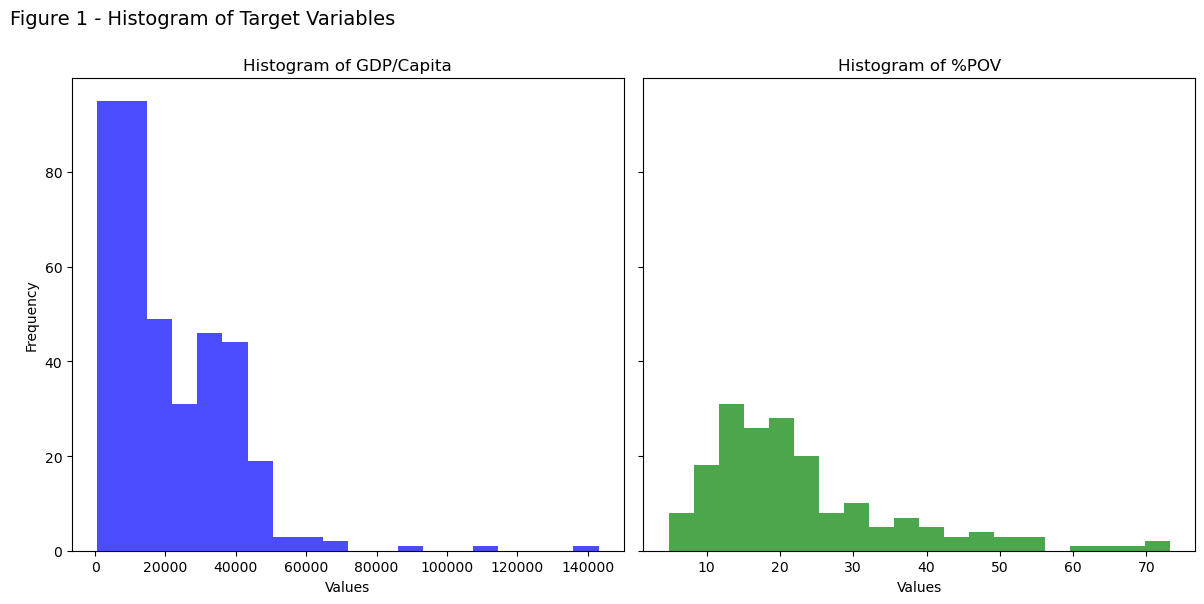

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot histogram for GDP
ax[0].hist(df_gdp_2['gdp'], bins=20, color='blue', alpha=0.7)
ax[0].set_title(f'Histogram of GDP/Capita')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

# Plot histogram for %POV
ax[1].hist(df_pov_2['%pov'], bins=20, color='green', alpha=0.7)
ax[1].set_title(f'Histogram of %POV')
ax[1].set_xlabel('Values')

fig.suptitle('Figure 1 - Histogram of Target Variables', x=0, y=1, ha='left', fontsize=14)

plt.tight_layout()
plt.show()

##### Plot histograms for CPIA related feature variables

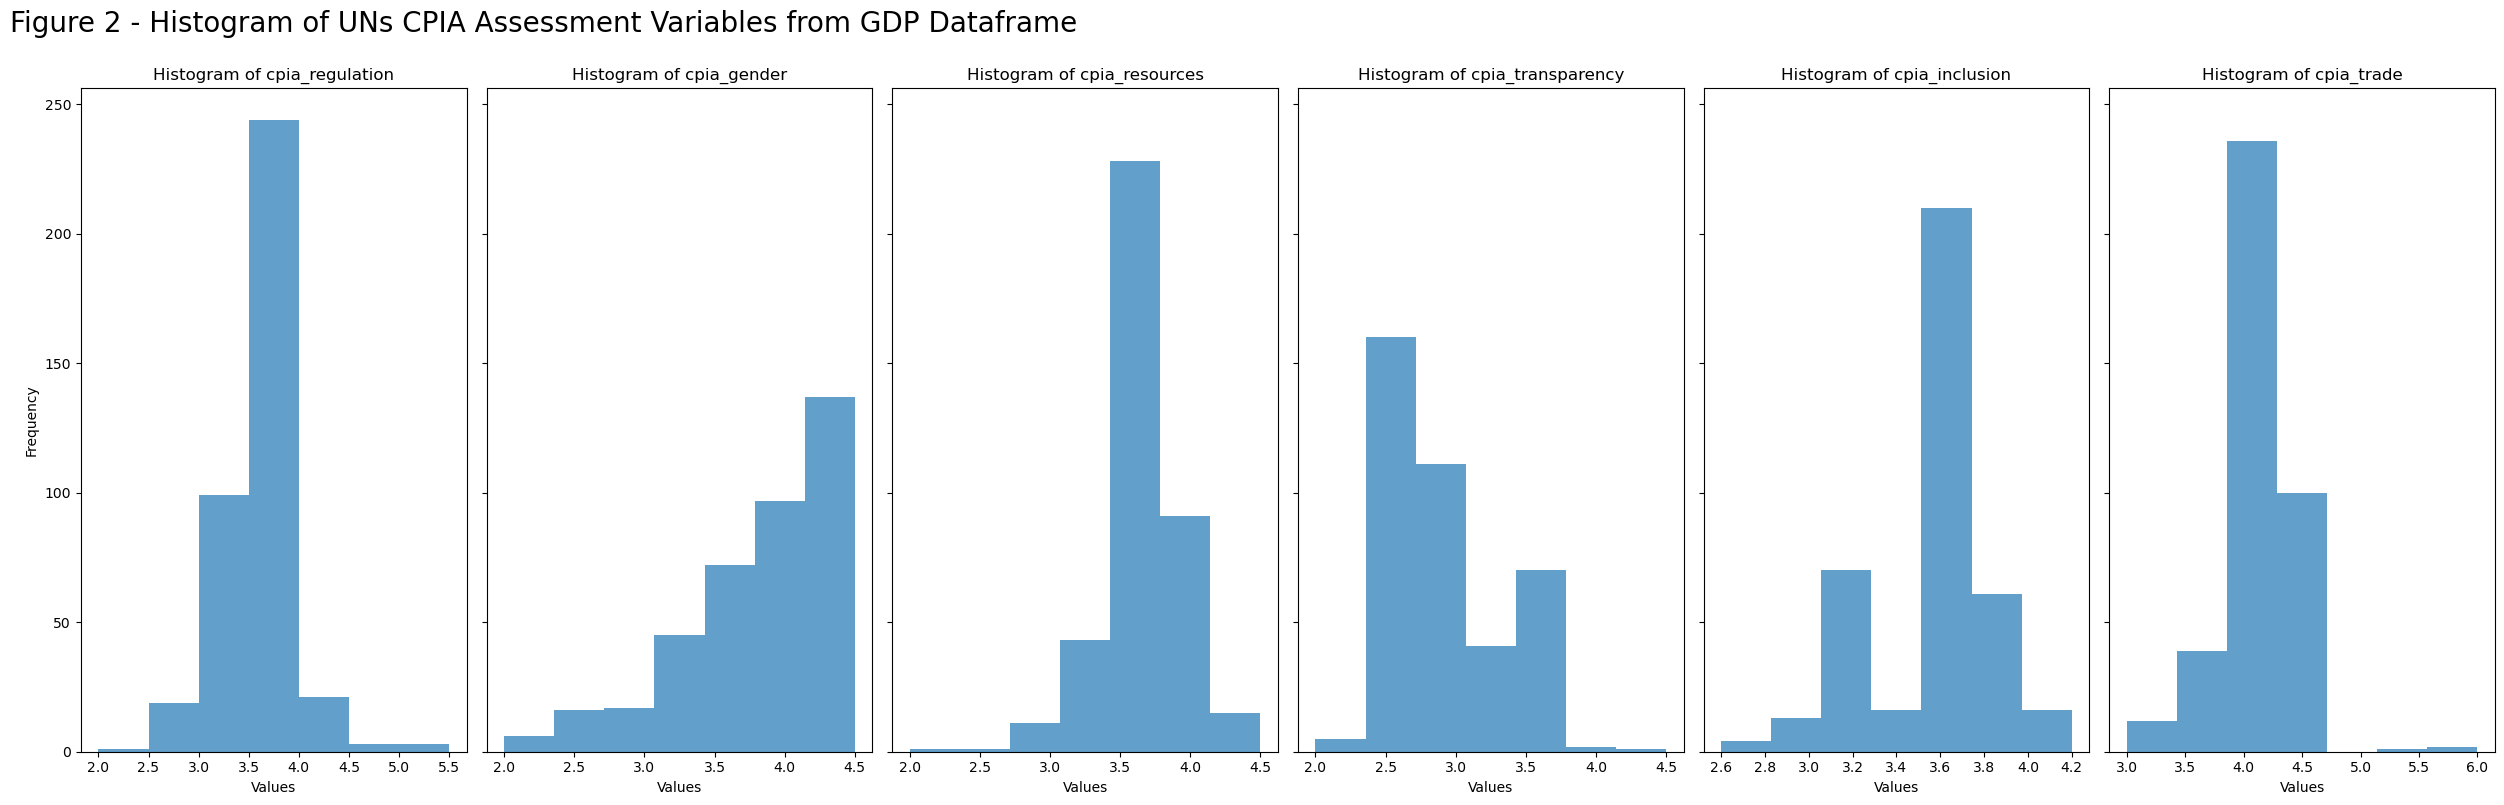

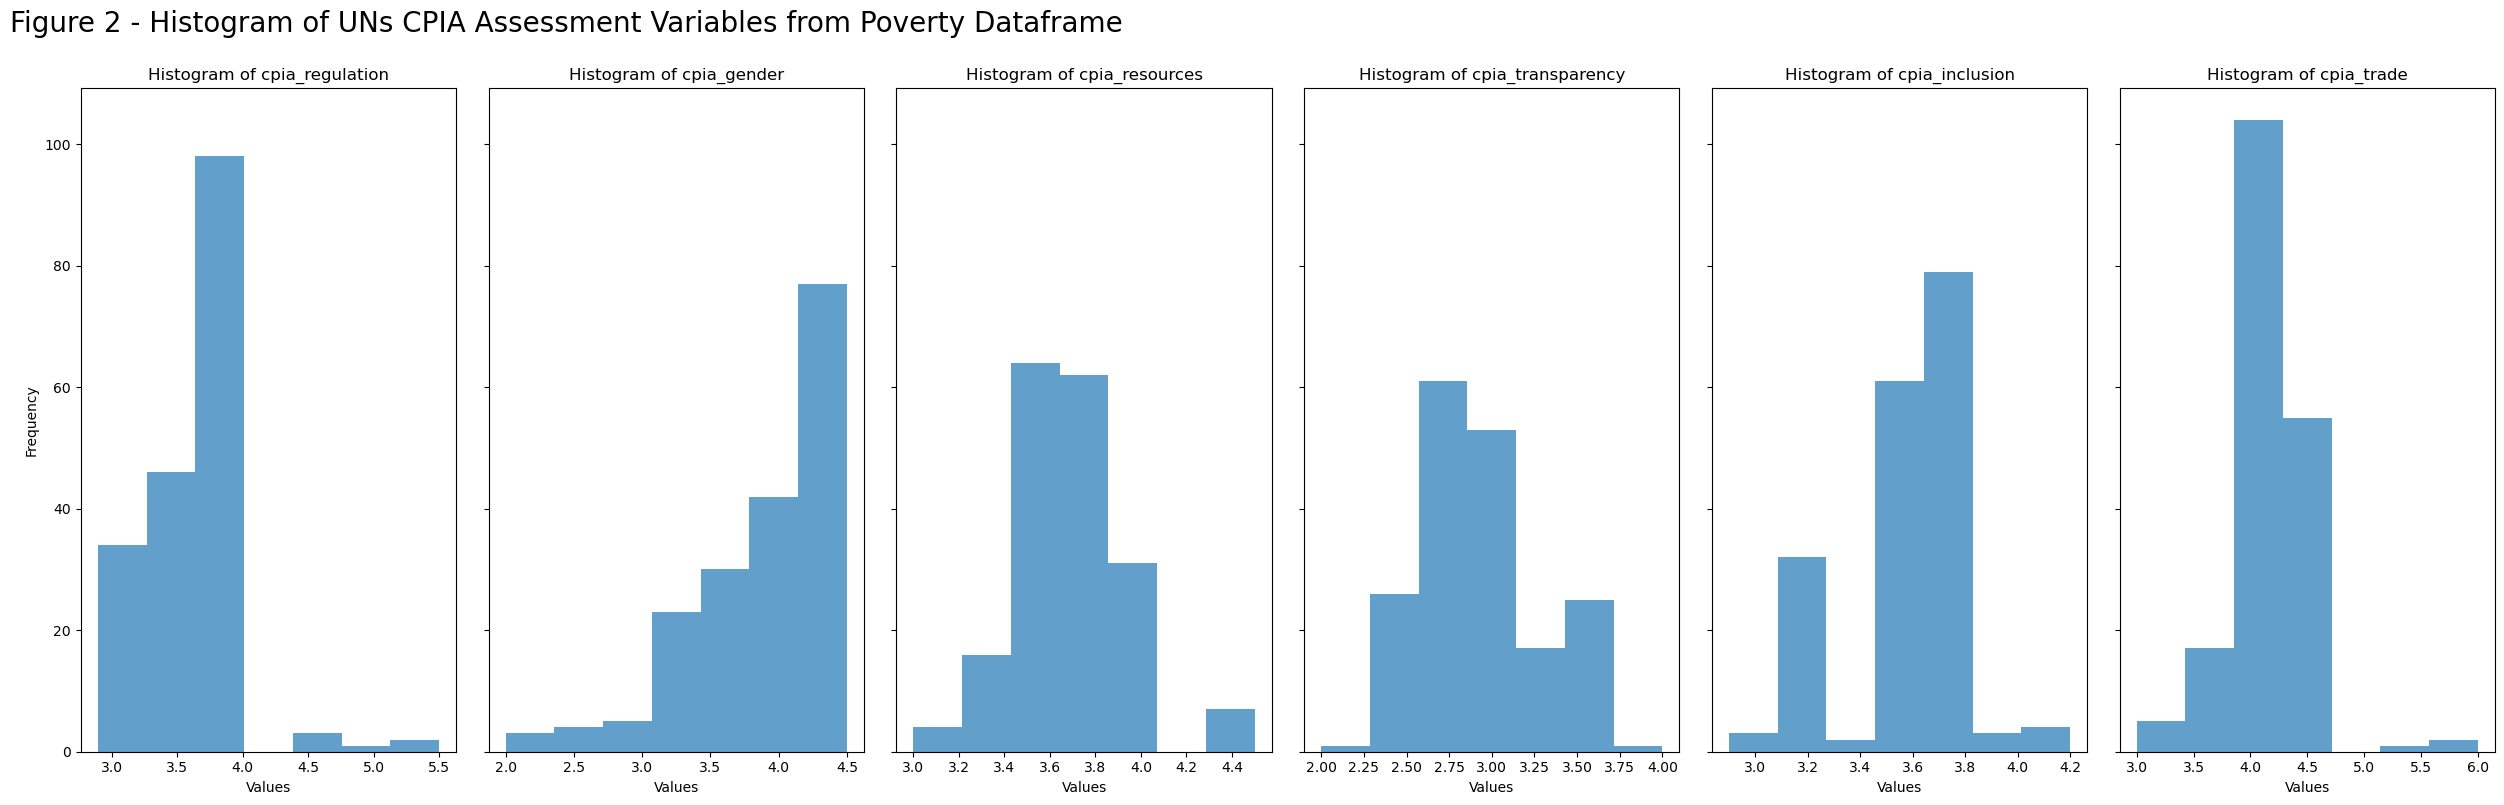

In [162]:
''' PLOTS OF CPIA RELATED FEATURE VARIABLES FROM GDP DATAFRAME'''
# Create a figure and axis objects
cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'cpia_trade']

fig, axes = plt.subplots(1, 6, figsize=(25, 8), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_gdp_2[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Figure 2 - Histogram of UNs CPIA Assessment Variables from GDP Dataframe', x=0, y=1, ha='left', fontsize=20)

# Ensure the layout fits well
plt.tight_layout()
plt.show()


''' PLOTS OF CPIA RELATED FEATURE VARIABLES FROM POVERTY DATAFRAME'''
# Create a figure and axis objects
cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'cpia_trade']

fig, axes = plt.subplots(1, 6, figsize=(25, 8), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_pov_2[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Figure 2 - Histogram of UNs CPIA Assessment Variables from Poverty Dataframe ', x=0, y=1, ha='left', fontsize=20)

# Ensure the layout fits well
plt.tight_layout()
plt.show()

##### Plot histograms for educaton related variables

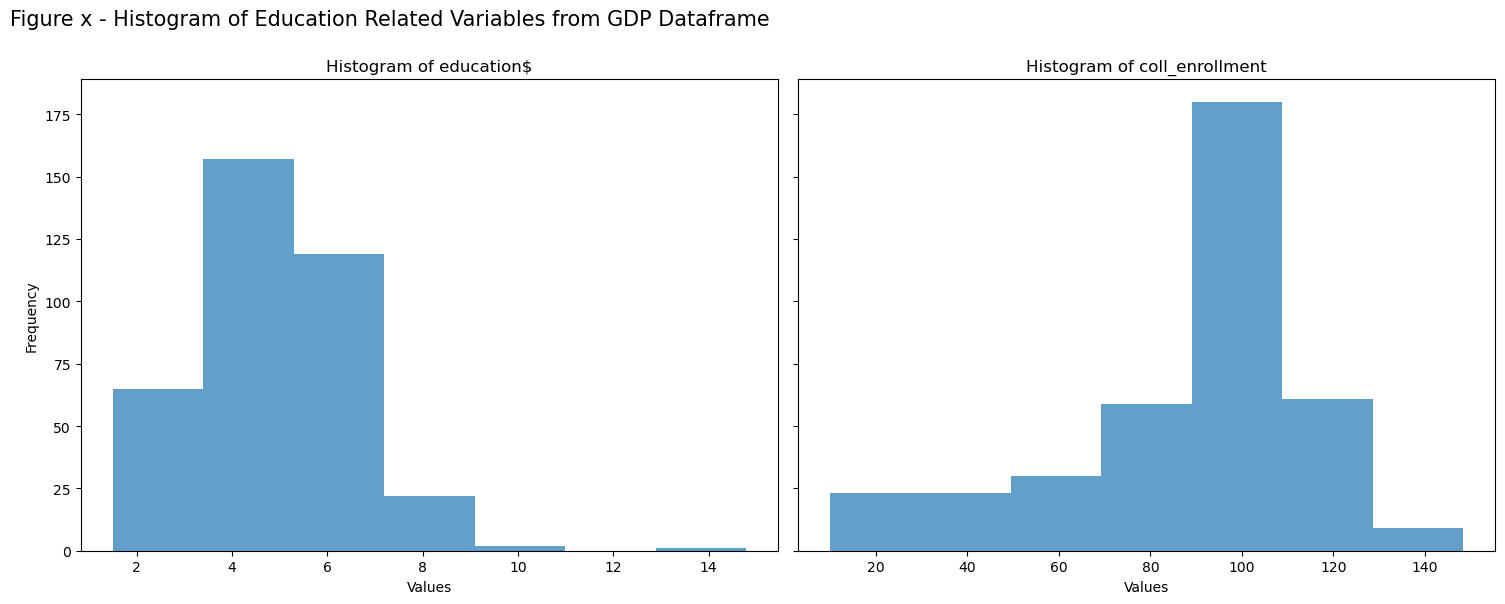

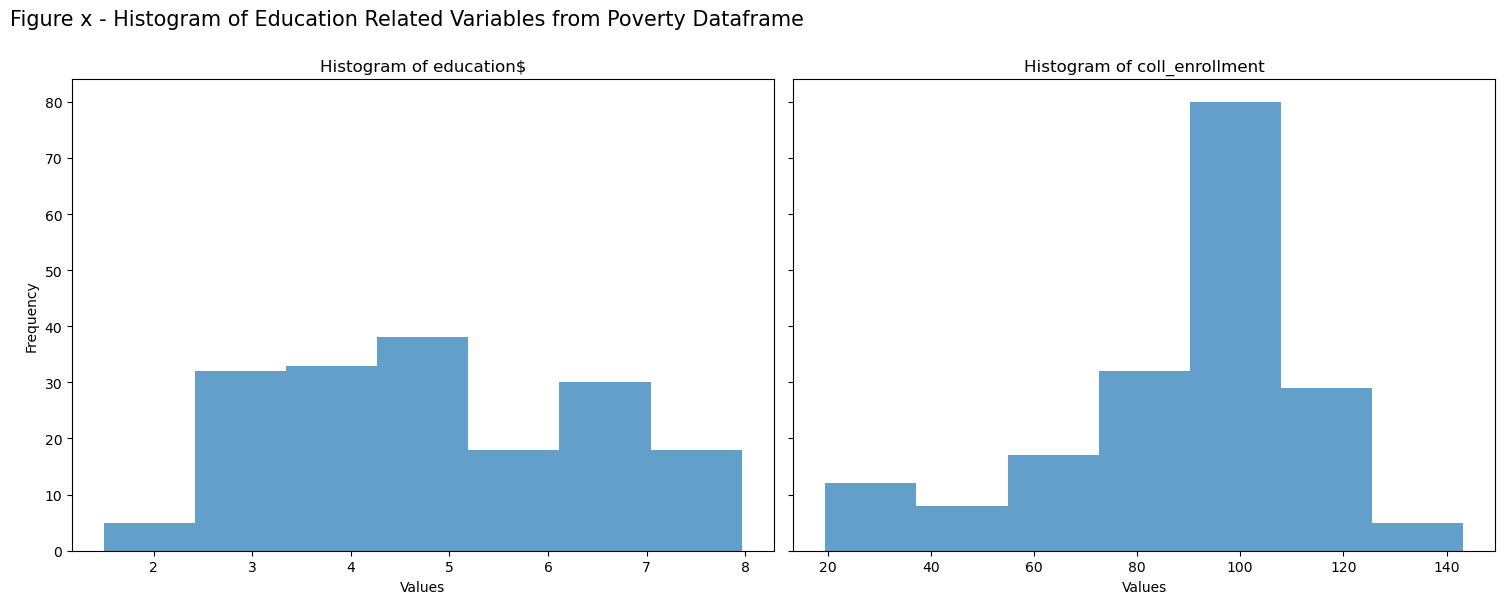

In [163]:
''' PLOTS OF EDUCATION RELATED FEATURE VARIABLES FROM GDP DATAFRAME'''
# Create a figure and axis objects
cols = ['education$', 'coll_enrollment']

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_gdp_2[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Figure x - Histogram of Education Related Variables from GDP Dataframe', x=0, y=1, ha='left', fontsize=15)

# Ensure the layout fits well
plt.tight_layout()
plt.show()


''' PLOTS OF EDUCATION RELATED FEATURE VARIABLE FROM POVERTY DATAFRAME'''
# Create a figure and axis objects
cols = ['education$', 'coll_enrollment']

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_pov_2[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Figure x - Histogram of Education Related Variables from Poverty Dataframe ', x=0, y=1, ha='left', fontsize=15)

# Ensure the layout fits well
plt.tight_layout()
plt.show()

##### Plot histograms for income related feature variables

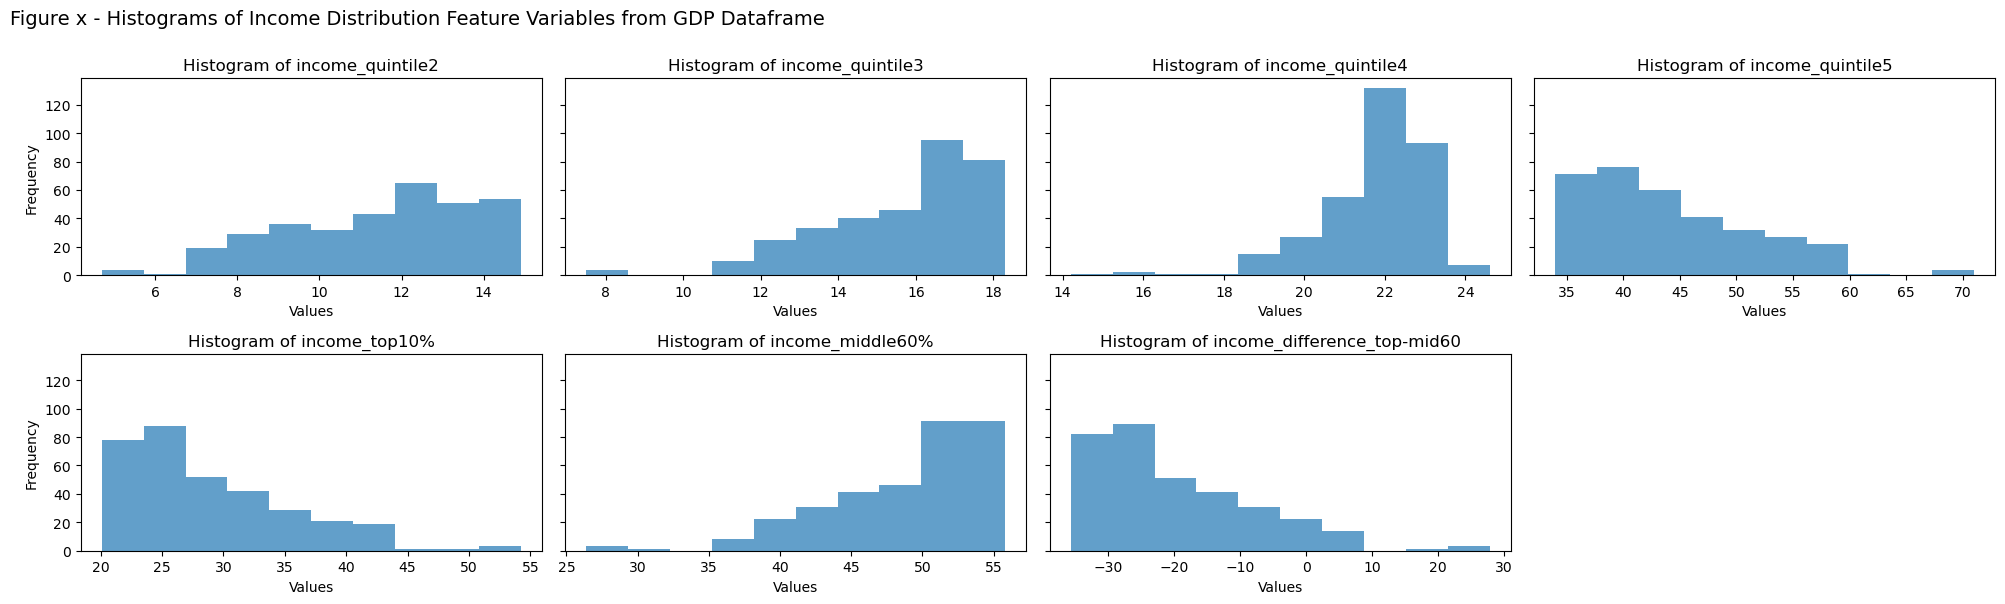

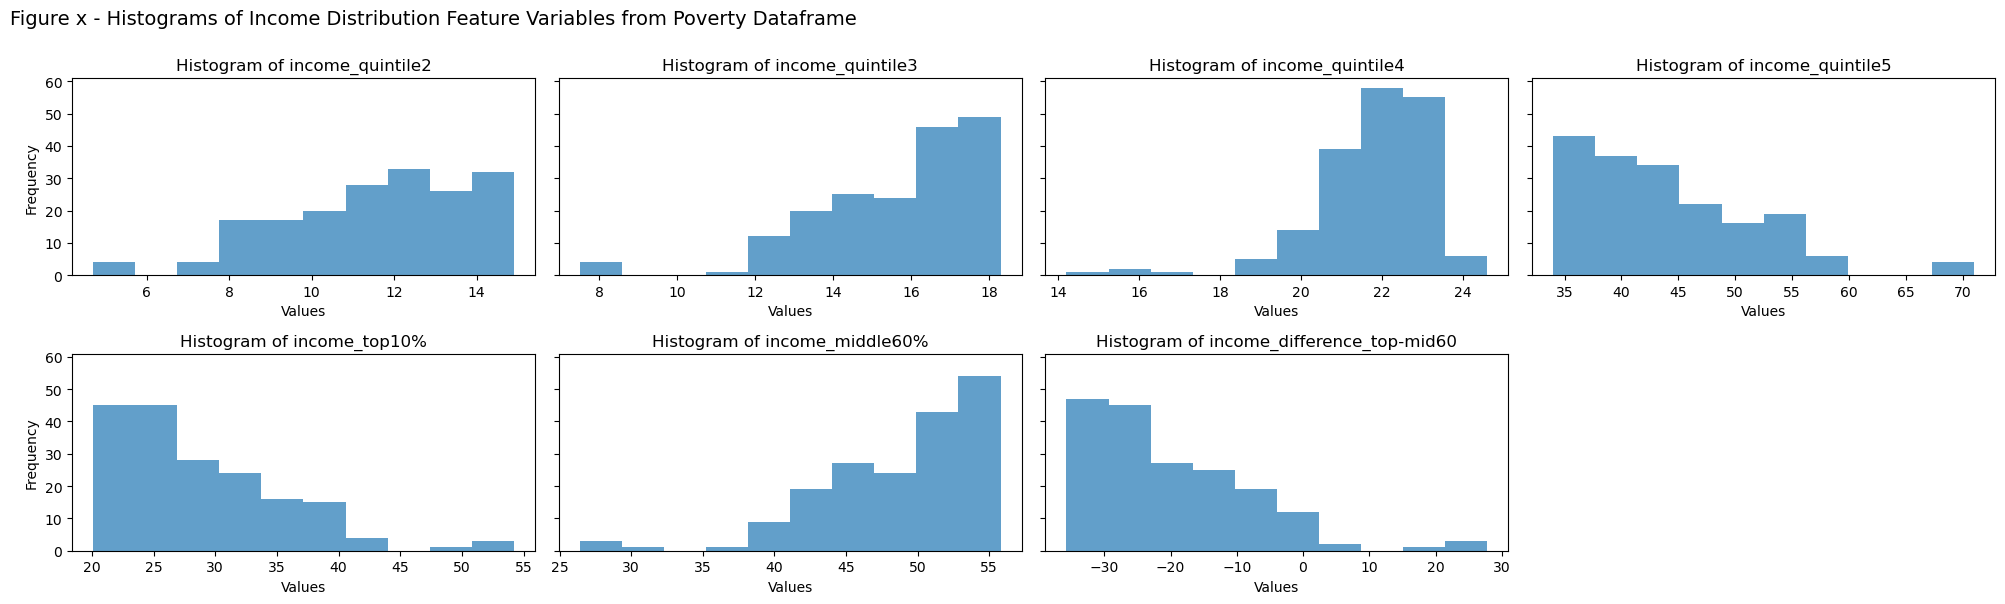

In [164]:
''' PLOTS OF INCOME RELATED FEATURE VARIABLES FROM GDP DATAFRAME'''

# Create a column of variables you want to graph
cols = ['income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%', 'income_difference_top-mid60']

# Create a figure and axis objects
fig, axes = plt.subplots(2, 4, figsize=(20, 6), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the histogram for each columns
for i, col in enumerate(cols):
    if i < len(axes):
        axes[i].hist(df_gdp_2[col], bins=10, alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        if i % 4 == 0:  ##### Only set ylabel for the first histogram in each row
            axes[i].set_ylabel('Frequency')
            
# Hide any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# Add a main title
fig.suptitle('Figure x - Histograms of Income Distribution Feature Variables from GDP Dataframe', x=0, y=1, ha='left', fontsize=14)

# Ensure the layout fits well
plt.tight_layout()
plt.show()

''' PLOTS OF INCOME RELATED FEATURE VARIABLES FROM POVERTY DATAFRAME'''

# Create a column of variables you want to graph
cols = ['income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%', 'income_difference_top-mid60']

# Create a figure and axis objects
fig, axes = plt.subplots(2, 4, figsize=(20, 6), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the histogram for each columns
for i, col in enumerate(cols):
    if i < len(axes):
        axes[i].hist(df_pov_2[col], bins=10, alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        if i % 4 == 0:  ##### Only set ylabel for the first histogram in each row
            axes[i].set_ylabel('Frequency')
            
# Hide any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# Add a main title
fig.suptitle('Figure x - Histograms of Income Distribution Feature Variables from Poverty Dataframe', x=0, y=1, ha='left', fontsize=14)

# Ensure the layout fits well
plt.tight_layout()
plt.show()

##### Plot histograms for trade related variables

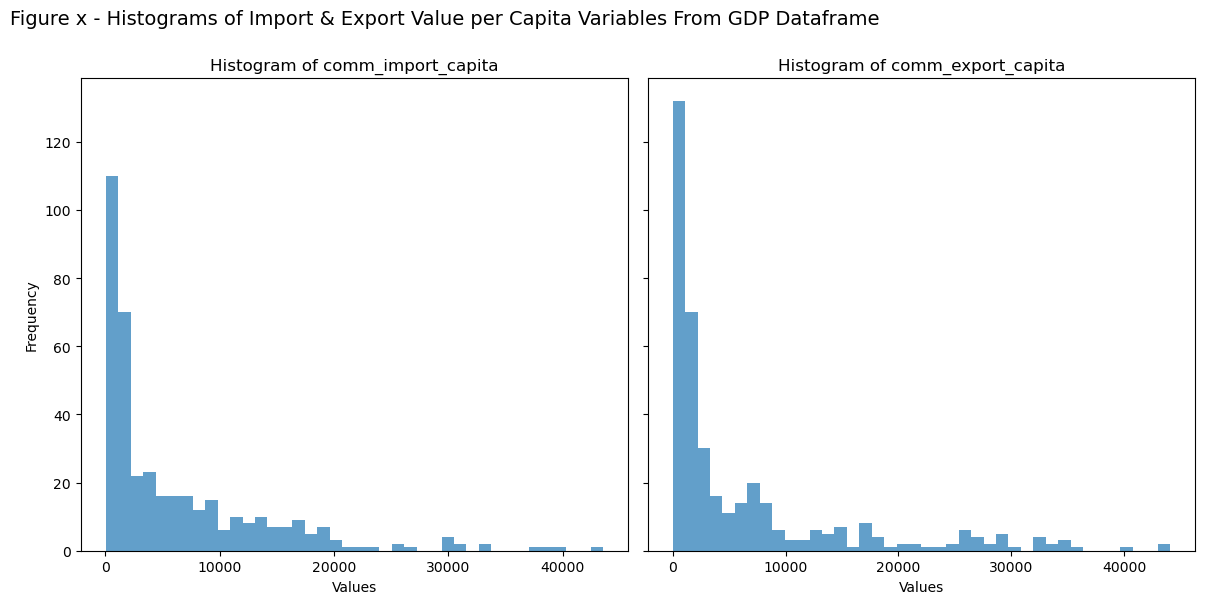

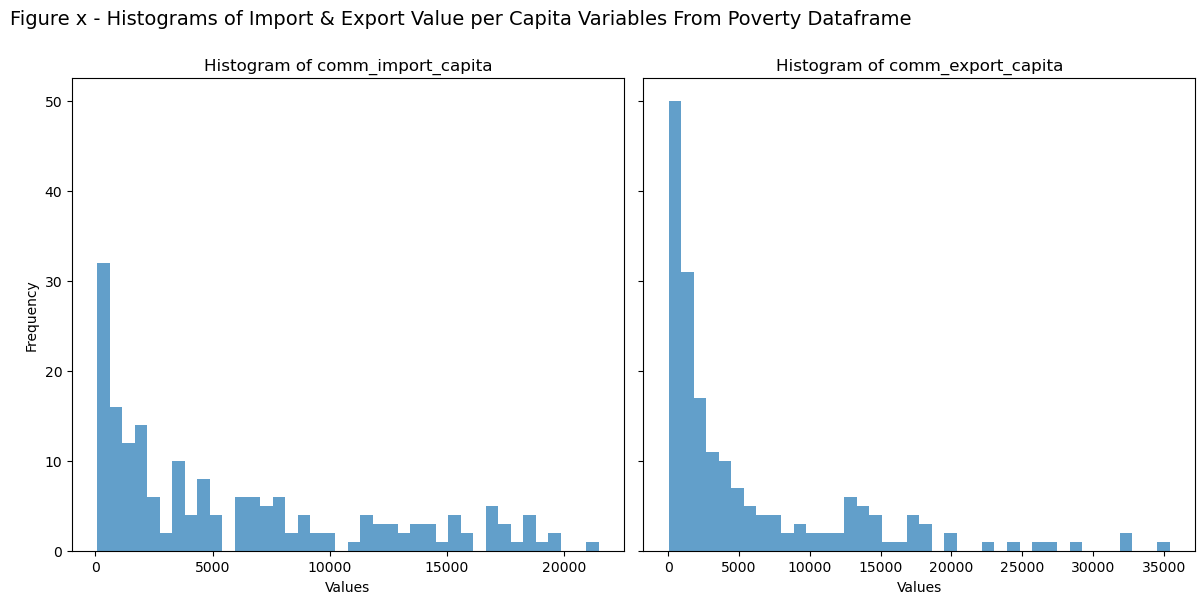

In [165]:
''' PLOTS OF TRADE RELATED FEATURE VARIABLES FROM GDP DATAFRAME'''
# Create a column of variables you want to graph
cols = ['comm_import_capita', 'comm_export_capita']

# Create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_gdp_2[col], bins=40, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Figure x - Histograms of Import & Export Value per Capita Variables From GDP Dataframe', x=0, y=1, ha='left', fontsize=14)

# Ensure the layout fits well
plt.tight_layout()
plt.show()


''' PLOTS OF TRADE RELATED FEATURE VARIABLES FROM POVERTY DATAFRAME'''
# Create a column of variables you want to graph
cols = ['comm_import_capita', 'comm_export_capita']

# Create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_pov_2[col], bins=40, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Figure x - Histograms of Import & Export Value per Capita Variables From Poverty Dataframe', x=0, y=1, ha='left', fontsize=14)

# Ensure the layout fits well
plt.tight_layout()
plt.show()


- All of the data has some level of skewness, and or kurtosis (peakedness). Therefor a strategy will be taken where a transfored dataset will be used for models that prefere normality and the regular dataset will be used for tree models
--pov_transformed
--pov
--gdp_transformed
--gdp

#### Impute the median to missing data for both poverty and gdp data

In [166]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='median')

''' IMPUTATION OF MISSING VALUES IN POVERTY DATAFRAME'''
# Impute the median into missing values for all relevant feature
df_pov_2['education$'] = imputer.fit_transform(df_pov_2[['education$']])
df_pov_2['coll_enrollment'] = imputer.fit_transform(df_pov_2[['coll_enrollment']])
df_pov_2['income_quintile2'] = imputer.fit_transform(df_pov_2[['income_quintile2']])
df_pov_2['income_quintile3'] = imputer.fit_transform(df_pov_2[['income_quintile3']])
df_pov_2['income_quintile4'] = imputer.fit_transform(df_pov_2[['income_quintile4']])
df_pov_2['income_quintile5'] = imputer.fit_transform(df_pov_2[['income_quintile5']])
df_pov_2['income_top10%'] = imputer.fit_transform(df_pov_2[['income_top10%']])
df_pov_2['income_middle60%'] = imputer.fit_transform(df_pov_2[['income_middle60%']])
df_pov_2['income_difference_top-mid60'] = imputer.fit_transform(df_pov_2[['income_difference_top-mid60']])

''' IMPUTATION OF MISSING VALUES IN GDP DATAFRAME'''
# Impute the median into missing values for all relevant feature
df_gdp_2['education$'] = imputer.fit_transform(df_gdp_2[['education$']])
df_gdp_2['coll_enrollment'] = imputer.fit_transform(df_gdp_2[['coll_enrollment']])
df_gdp_2['income_quintile2'] = imputer.fit_transform(df_gdp_2[['income_quintile2']])
df_gdp_2['income_quintile3'] = imputer.fit_transform(df_gdp_2[['income_quintile3']])
df_gdp_2['income_quintile4'] = imputer.fit_transform(df_gdp_2[['income_quintile4']])
df_gdp_2['income_quintile5'] = imputer.fit_transform(df_gdp_2[['income_quintile5']])
df_gdp_2['income_top10%'] = imputer.fit_transform(df_gdp_2[['income_top10%']])
df_gdp_2['income_middle60%'] = imputer.fit_transform(df_gdp_2[['income_middle60%']])
df_gdp_2['income_difference_top-mid60'] = imputer.fit_transform(df_gdp_2[['income_difference_top-mid60']])

# Verify no missing values
print('Verification of successful imputation for poverty dataframe')
print(df_pov_2.isnull().mean() *100)
print(f'Number of rows in df: {len(df_pov_2)}\n')

# Verify no missing values
print('Verification of successful imputation for gdp dataframe')
print(df_gdp_2.isnull().mean() *100)
print(f'Number of rows in df: {len(df_gdp_2)}')   

Verification of successful imputation for poverty dataframe
country                        0.0
region                         0.0
un_region                      0.0
year                           0.0
%pov                           0.0
cpia_regulation                0.0
cpia_gender                    0.0
cpia_resources                 0.0
cpia_transparency              0.0
cpia_inclusion                 0.0
cpia_trade                     0.0
education$                     0.0
coll_enrollment                0.0
income_quintile2               0.0
income_quintile3               0.0
income_quintile4               0.0
income_quintile5               0.0
income_top10%                  0.0
income_middle60%               0.0
income_difference_top-mid60    0.0
comm_import_capita             0.0
comm_export_capita             0.0
dtype: float64
Number of rows in df: 184

Verification of successful imputation for gdp dataframe
country                        0.0
region                         0.0
un

##### Create a function to transform each variable

In [167]:
from scipy.stats import boxcox

# Dictionary to store transformation
transformation_map = {}

# build a function to determine appropriate transformation for variables
def apply_transformation(df, feature):
    global transformation_map
    skewness = df[feature].skew()
    kurtosis = df[feature].kurtosis()
    
    if (skewness > 1 or kurtosis > 10) and (df[feature] > 0).all():
        transformation_map[feature] = 'log'
        return np.log1p(df[feature]) # Log transform
    elif (skewness > 0.5 or kurtosis > 5) and (df[feature] > 0).all():
        transformation_map[feature] = 'sqrt'
        return np.sqrt(df[feature])  # sqrt transform
    elif skewness > 0.25 or kurtosis > 3 and (df[feature] > 0).all():
        transformation_map[feature] = 'boxcox'
        return boxcox(df[feature] + 1)[0] # boxcox transform
    else:
        transformation_map[feature] = 'none'
        return df[feature] # keep as is


##### Transform poverty

In [168]:
# Create a poverty df with only continuous data in it to transform it
df_pov_2_continuous = df_pov_2.drop(columns=['country','region','un_region', 'year', 'income_difference_top-mid60'])
    
# Apply transformation to poverty
df_pov_2_transf = df_pov_2_continuous.apply(lambda x: apply_transformation(df_pov_2_continuous, x.name))

print(transformation_map)

{'%pov': 'log', 'cpia_regulation': 'log', 'cpia_gender': 'none', 'cpia_resources': 'sqrt', 'cpia_transparency': 'sqrt', 'cpia_inclusion': 'none', 'cpia_trade': 'sqrt', 'education$': 'none', 'coll_enrollment': 'none', 'income_quintile2': 'none', 'income_quintile3': 'none', 'income_quintile4': 'sqrt', 'income_quintile5': 'log', 'income_top10%': 'log', 'income_middle60%': 'none', 'comm_import_capita': 'sqrt', 'comm_export_capita': 'log'}


##### Summarize Transformed data for poverty dataframe

In [169]:
print('Summary of transformed data')
print(df_gdp_2_transf.describe(), '\n\n')  # Look for min/max values
print('Verification of no infinity values')
print((df_gdp_2_transf == -np.inf).sum())  # Count -inf values

Summary of transformed data
              gdp  cpia_regulation  cpia_gender  cpia_resources  \
count  390.000000       390.000000   390.000000      390.000000   
mean     9.515390         3.477387     3.818888        6.304316   
std      1.047747         0.364355     0.538038        0.655788   
min      6.343353         1.971161     2.000000        2.870531   
25%      8.982549         3.373805     3.500000        6.012244   
50%      9.615322         3.588588     4.000000        6.293673   
75%     10.408463         3.695893     4.250000        6.678522   
max     11.871098         5.352658     4.500000        8.288775   

       cpia_transparency  cpia_inclusion  cpia_trade  education$  \
count         390.000000      390.000000  390.000000  390.000000   
mean            1.709664        3.550425    2.026238    2.182443   
std             0.108246        0.272205    0.081700    0.347795   
min             1.414214        2.600000    1.732051    1.223180   
25%             1.622109    

##### Transform gdp

In [170]:
# Create a poverty df with only continuous data in it to transform it
df_gdp_2_continuous = df_gdp_2.drop(columns=['country','region','un_region', 'year', 'income_difference_top-mid60'])
    
# Apply transformation to poverty
df_gdp_2_transf = df_gdp_2_continuous.apply(lambda x: apply_transformation(df_gdp_2_continuous, x.name))

print(transformation_map)

{'%pov': 'log', 'cpia_regulation': 'boxcox', 'cpia_gender': 'none', 'cpia_resources': 'boxcox', 'cpia_transparency': 'sqrt', 'cpia_inclusion': 'none', 'cpia_trade': 'sqrt', 'education$': 'sqrt', 'coll_enrollment': 'none', 'income_quintile2': 'none', 'income_quintile3': 'none', 'income_quintile4': 'sqrt', 'income_quintile5': 'log', 'income_top10%': 'log', 'income_middle60%': 'none', 'comm_import_capita': 'log', 'comm_export_capita': 'log', 'gdp': 'log'}


##### Summarize Transformed data for gdp dataframe

In [171]:
print('Summary of transformed data')
print(df_gdp_2_transf.describe(), '\n\n')  # Look for min/max values
print('Verification of no infinity values')
print((df_gdp_2_transf == -np.inf).sum())  # Count -inf values

Summary of transformed data
              gdp  cpia_regulation  cpia_gender  cpia_resources  \
count  390.000000       390.000000   390.000000      390.000000   
mean     9.515390         3.477387     3.818888        6.304316   
std      1.047747         0.364355     0.538038        0.655788   
min      6.343353         1.971161     2.000000        2.870531   
25%      8.982549         3.373805     3.500000        6.012244   
50%      9.615322         3.588588     4.000000        6.293673   
75%     10.408463         3.695893     4.250000        6.678522   
max     11.871098         5.352658     4.500000        8.288775   

       cpia_transparency  cpia_inclusion  cpia_trade  education$  \
count         390.000000      390.000000  390.000000  390.000000   
mean            1.709664        3.550425    2.026238    2.182443   
std             0.108246        0.272205    0.081700    0.347795   
min             1.414214        2.600000    1.732051    1.223180   
25%             1.622109    

Note: I removed 'income_difference_top-mid60' - There are negative numbers in that series that cause issues with log and box-cox transformations

### Plot variables post transformation

##### Plot target variables post transformation

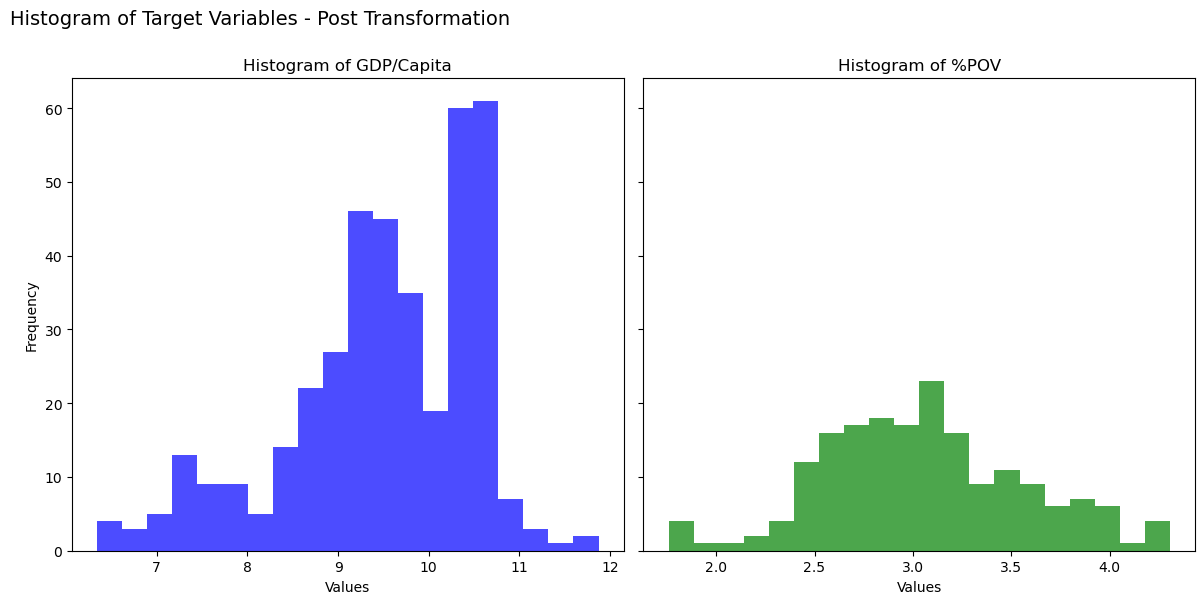

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot histogram for GDP
ax[0].hist(df_gdp_2_transf['gdp'], bins=20, color='blue', alpha=0.7)
ax[0].set_title(f'Histogram of GDP/Capita')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

# Plot histogram for %POV
ax[1].hist(df_pov_2_transf['%pov'], bins=20, color='green', alpha=0.7)
ax[1].set_title(f'Histogram of %POV')
ax[1].set_xlabel('Values')

fig.suptitle('Histogram of Target Variables - Post Transformation', x=0, y=1, ha='left', fontsize=14)

plt.tight_layout()
plt.show()

##### Plot CPIA varables post transformation

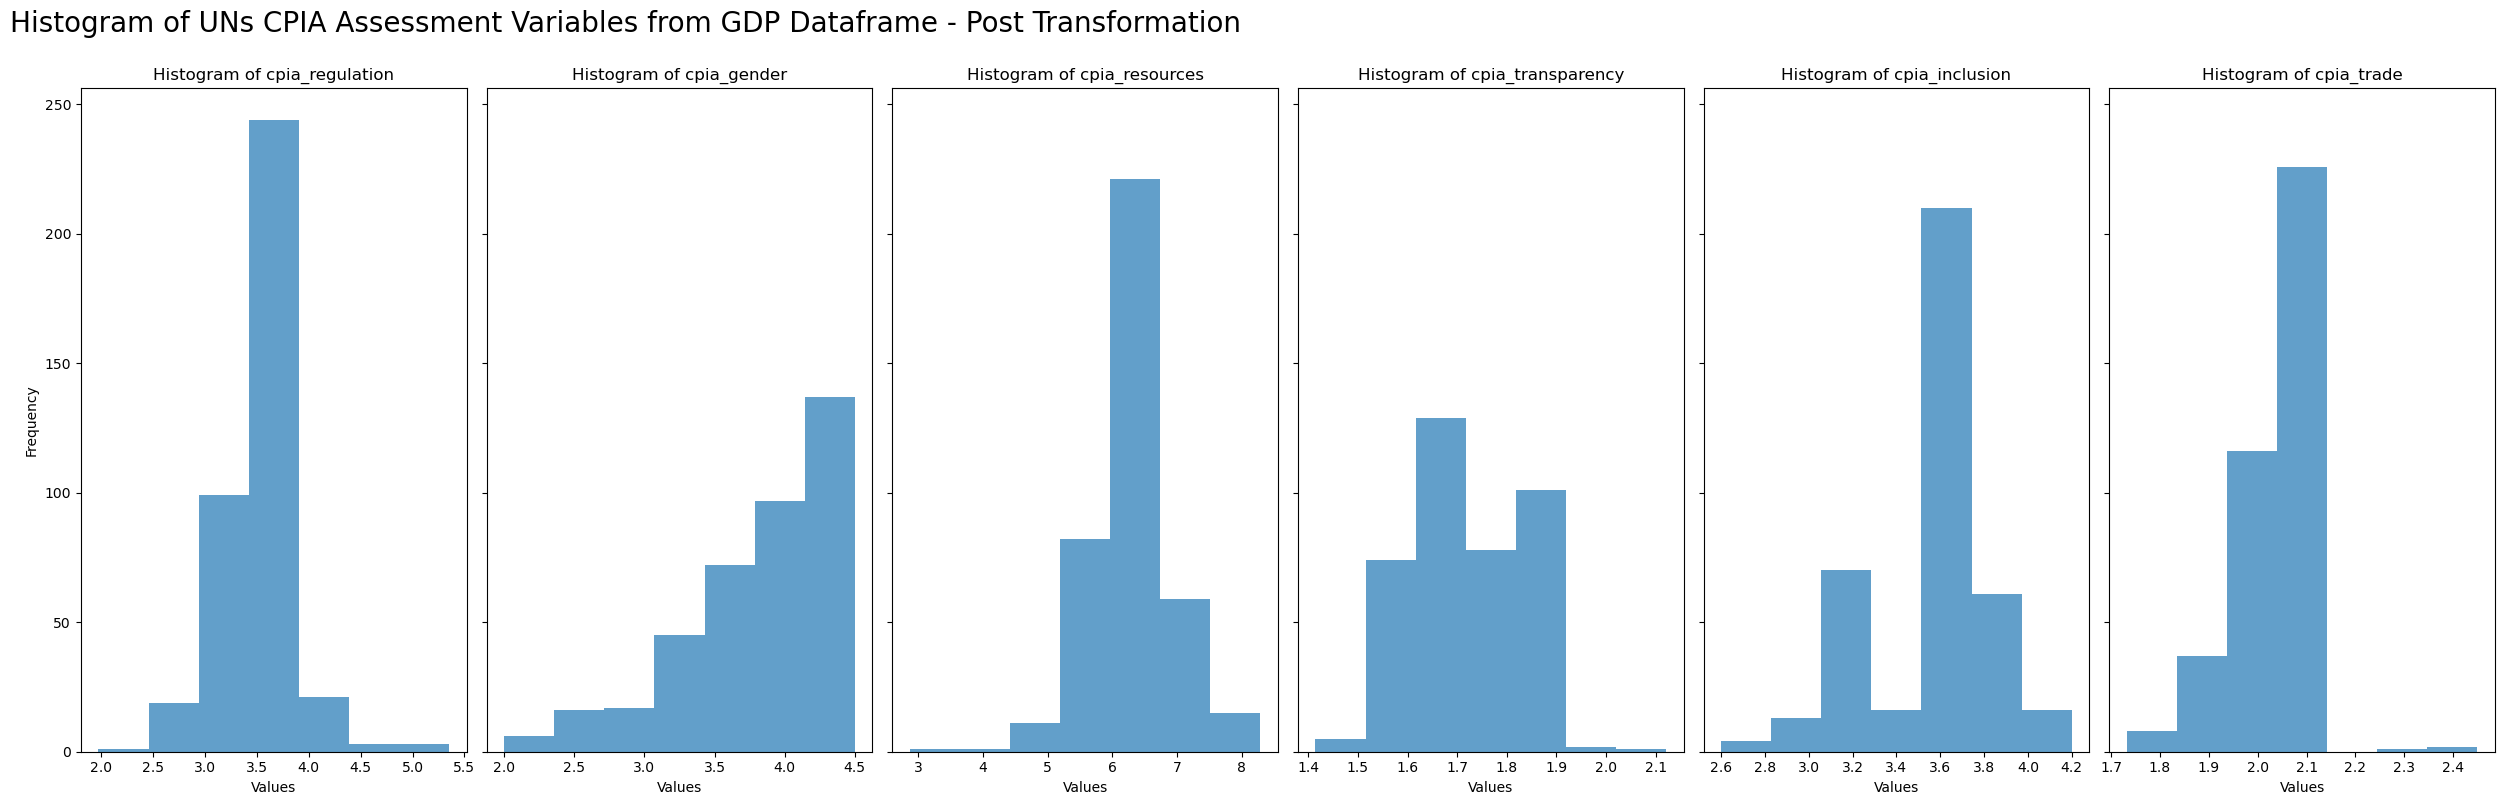

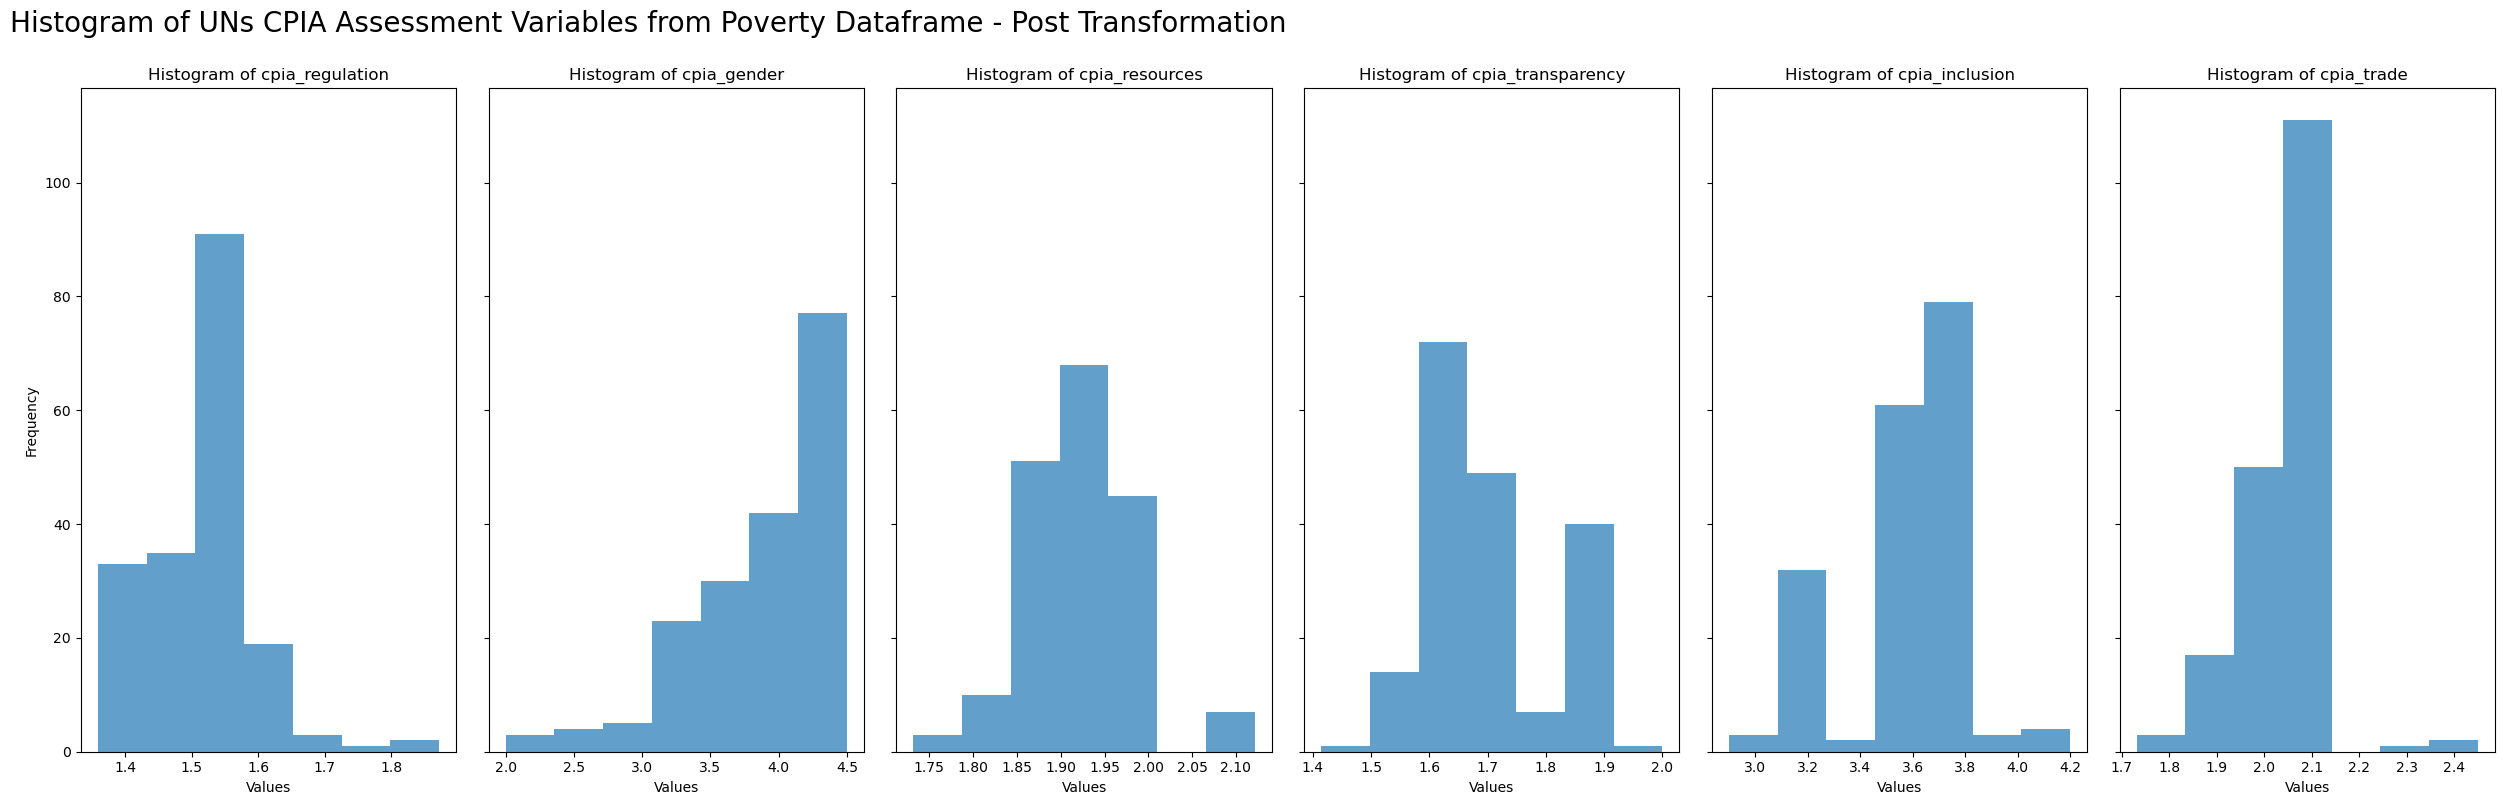

In [173]:
''' PLOTS FOR CPIA RELATED FEATURE VARIABLES FROM GDP DATAFRAME - POST TRANSFORMATION'''
# Create a figure and axis objects
cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'cpia_trade']

fig, axes = plt.subplots(1, 6, figsize=(25, 8), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_gdp_2_transf[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Histogram of UNs CPIA Assessment Variables from GDP Dataframe - Post Transformation', x=0, y=1, ha='left', fontsize=20)

# Ensure the layout fits well
plt.tight_layout()
plt.show()


''' PLOTS FOR CPIA RELATED FEATURE VARIABLES FROM POVERTY DATAFRAME - POST TRANSFORMATION '''
# Create a figure and axis objects
cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'cpia_trade']

fig, axes = plt.subplots(1, 6, figsize=(25, 8), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_pov_2_transf[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Histogram of UNs CPIA Assessment Variables from Poverty Dataframe - Post Transformation', x=0, y=1, ha='left', fontsize=20)

# Ensure the layout fits well
plt.tight_layout()
plt.show()

##### Plot Education related variables post transformation 

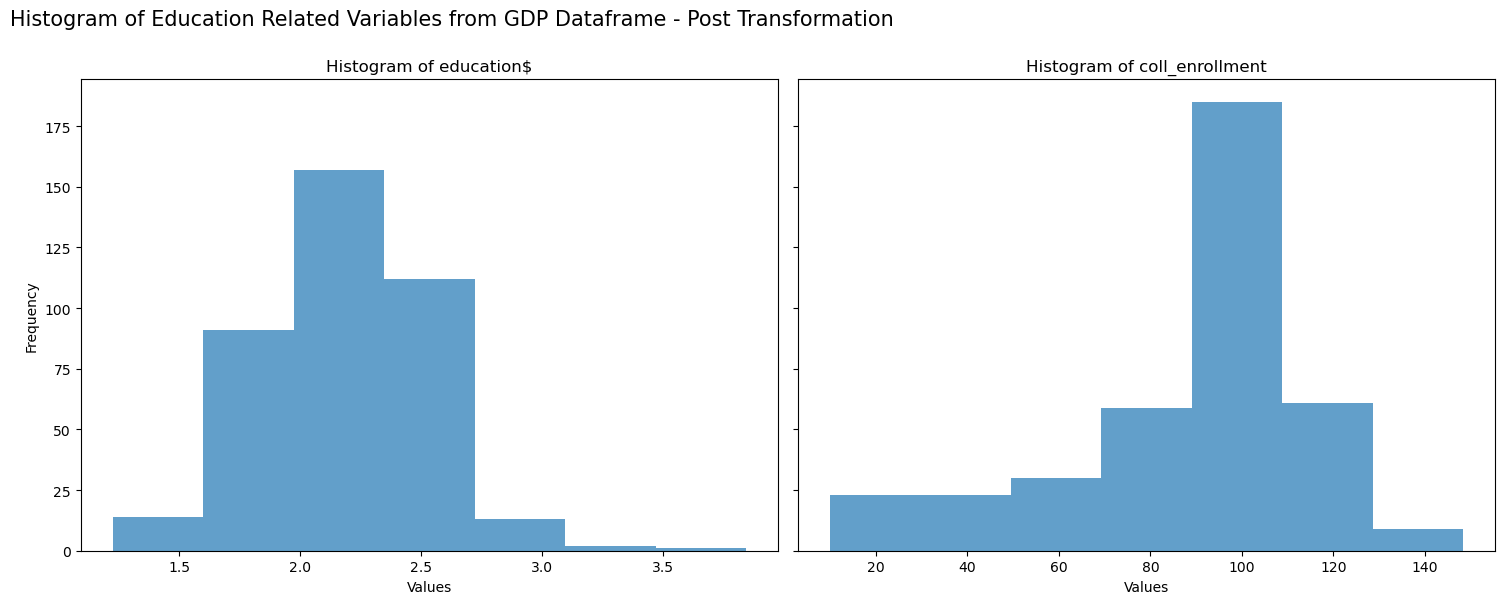

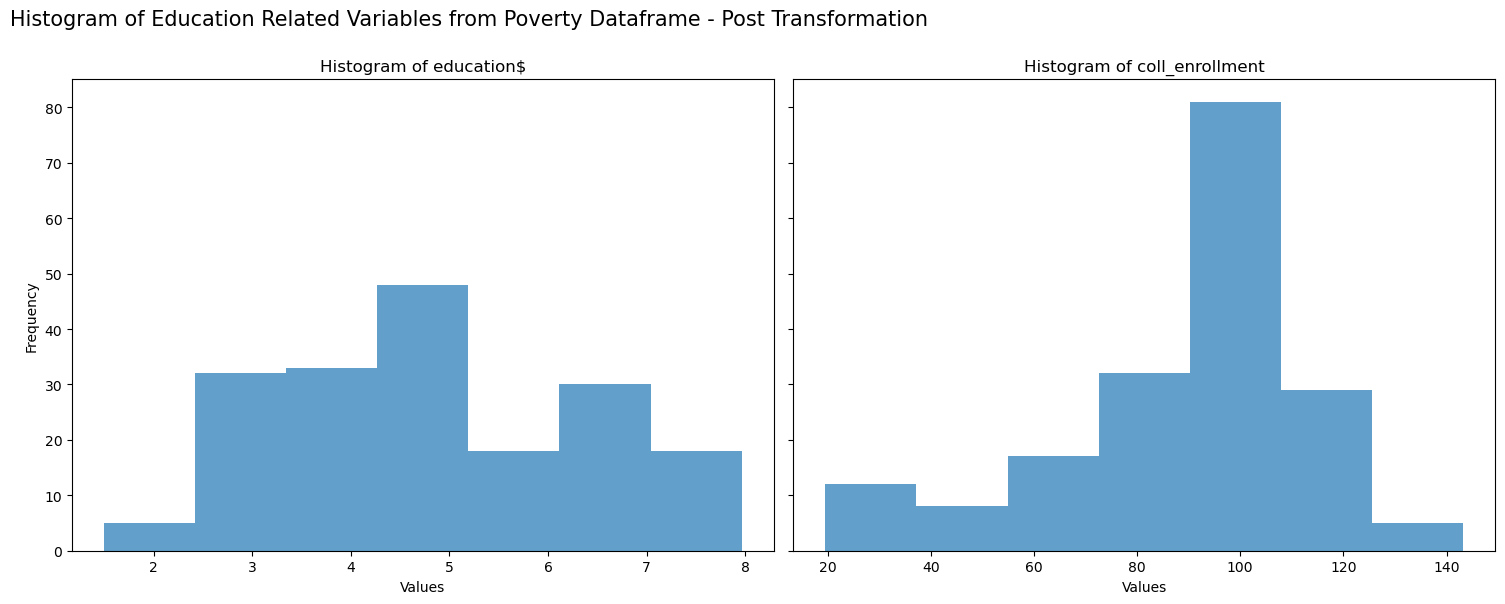

In [174]:
''' PLOTS OF EDUCATION RELATED FEATURE VARIABLES FROM GDP DATAFRAME - POST TRANSFORMATION '''
# Create a figure and axis objects
cols = ['education$', 'coll_enrollment']

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_gdp_2_transf[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Histogram of Education Related Variables from GDP Dataframe - Post Transformation', x=0, y=1, ha='left', fontsize=15)

# Ensure the layout fits well
plt.tight_layout()
plt.show()


''' PLOTS OF EDUCATION RELATED FEATURE VARIABLE FROM POVERTY DATAFRAME - POST TRANSFORMATION'''
# Create a figure and axis objects
cols = ['education$', 'coll_enrollment']

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_pov_2_transf[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Histogram of Education Related Variables from Poverty Dataframe - Post Transformation', x=0, y=1, ha='left', fontsize=15)

# Ensure the layout fits well
plt.tight_layout()
plt.show()

##### Plot Income related variables post transformation

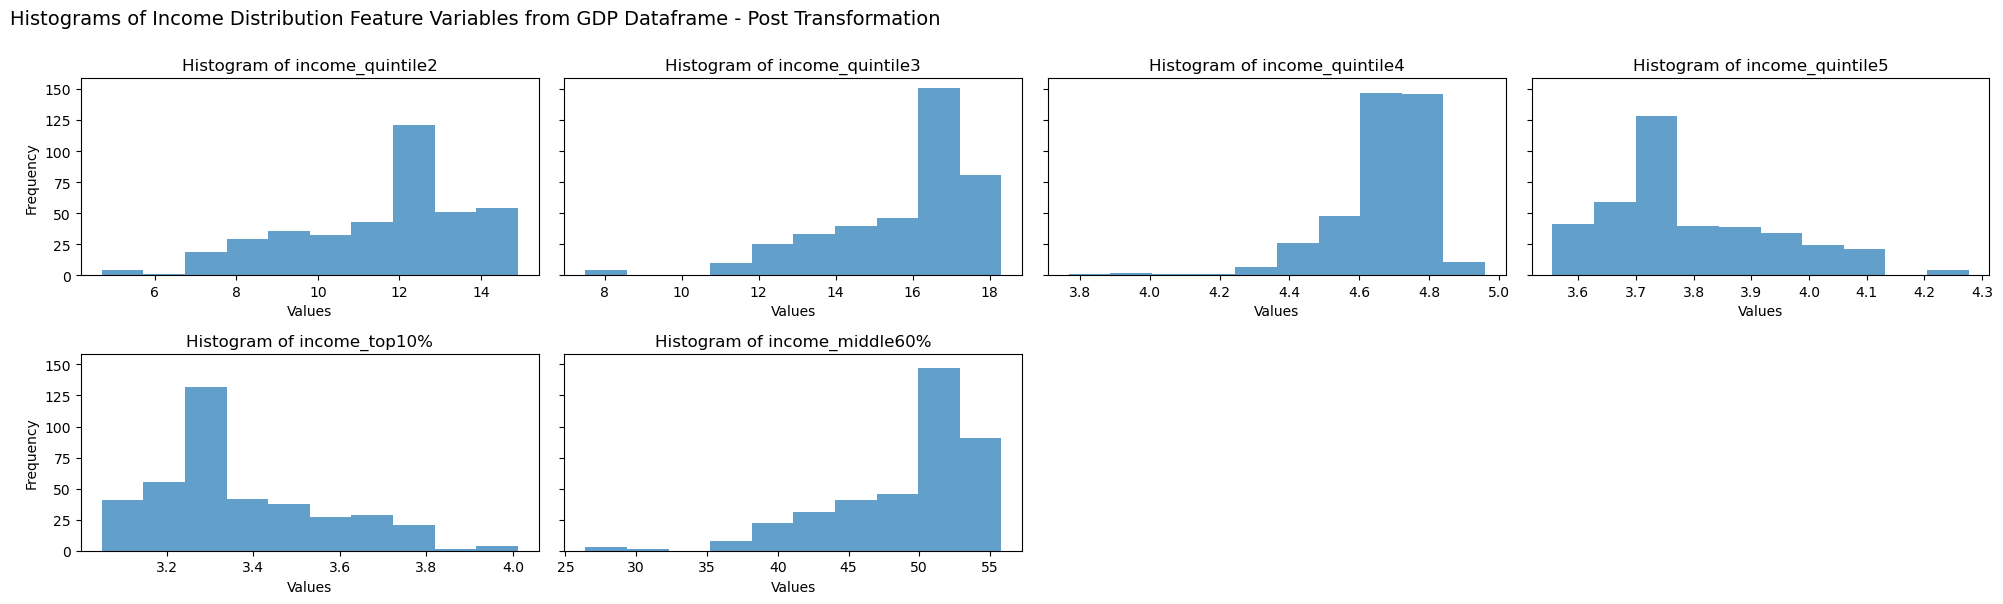

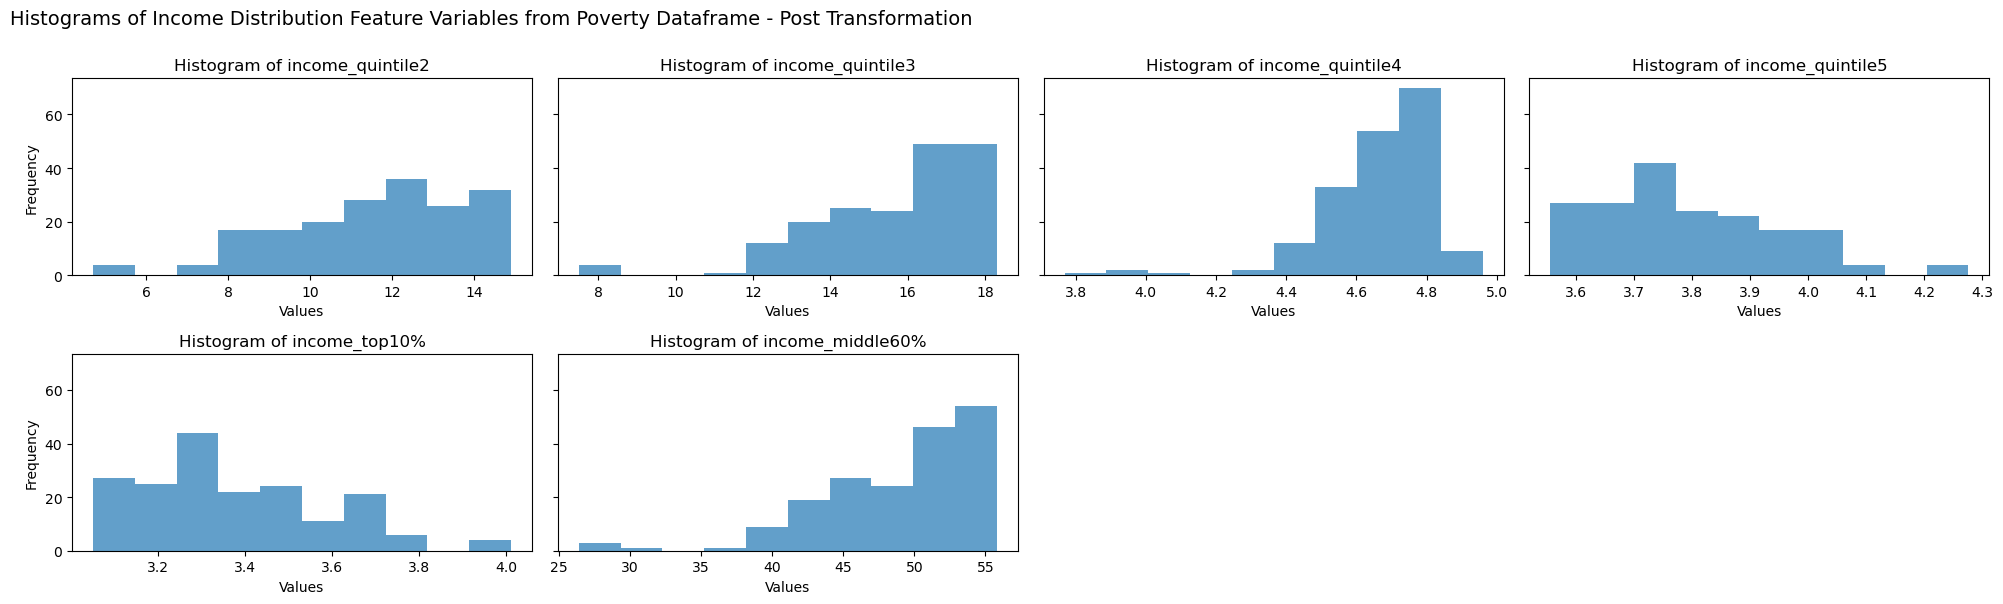

In [175]:
''' PLOTS OF INCOME RELATED FEATURE VARIABLES FROM GDP DATAFRAME - POST TRANSFORMATION'''

# Create a column of variables you want to graph
cols = ['income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%']

# Create a figure and axis objects
fig, axes = plt.subplots(2, 4, figsize=(20, 6), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the histogram for each columns
for i, col in enumerate(cols):
    if i < len(axes):
        axes[i].hist(df_gdp_2_transf[col], bins=10, alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        if i % 4 == 0:  ##### Only set ylabel for the first histogram in each row
            axes[i].set_ylabel('Frequency')
            
# Hide any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# Add a main title
fig.suptitle('Histograms of Income Distribution Feature Variables from GDP Dataframe - Post Transformation', x=0, y=1, ha='left', fontsize=14)

# Ensure the layout fits well
plt.tight_layout()
plt.show()

''' PLOTS OF INCOME RELATED FEATURE VARIABLES FROM POVERTY DATAFRAME - POST TRANSFORMATION '''

# Create a column of variables you want to graph
cols = ['income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%']

# Create a figure and axis objects
fig, axes = plt.subplots(2, 4, figsize=(20, 6), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the histogram for each columns
for i, col in enumerate(cols):
    if i < len(axes):
        axes[i].hist(df_pov_2_transf[col], bins=10, alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        if i % 4 == 0:  ##### Only set ylabel for the first histogram in each row
            axes[i].set_ylabel('Frequency')
            
# Hide any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# Add a main title
fig.suptitle('Histograms of Income Distribution Feature Variables from Poverty Dataframe - Post Transformation', x=0, y=1, ha='left', fontsize=14)

# Ensure the layout fits well
plt.tight_layout()
plt.show()

##### Plot histograms for trade related variables post transformation

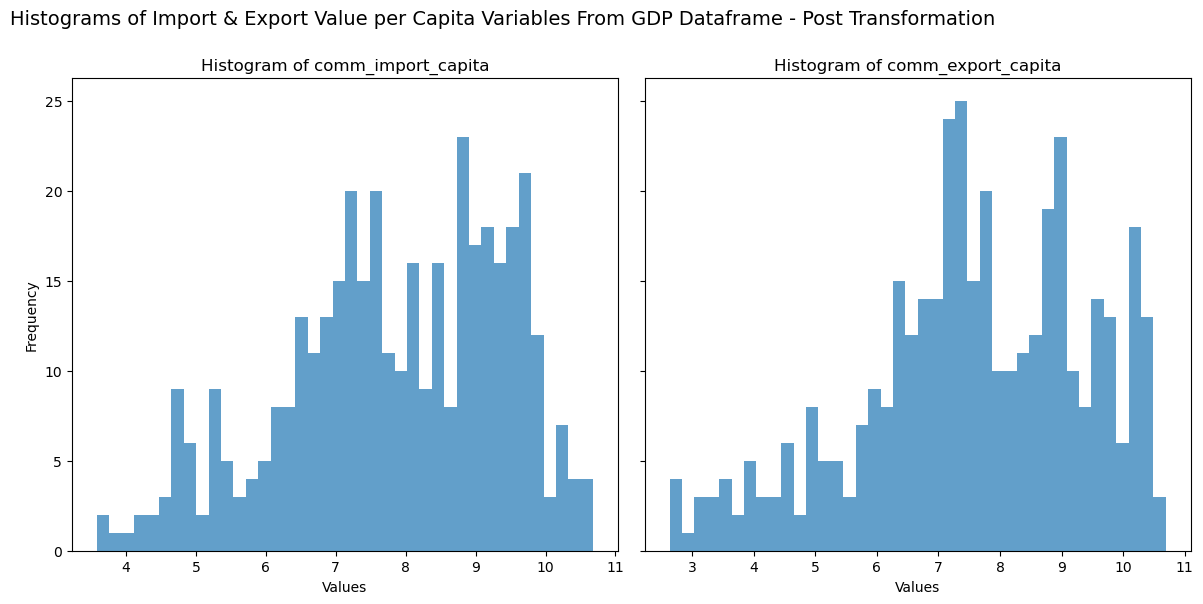

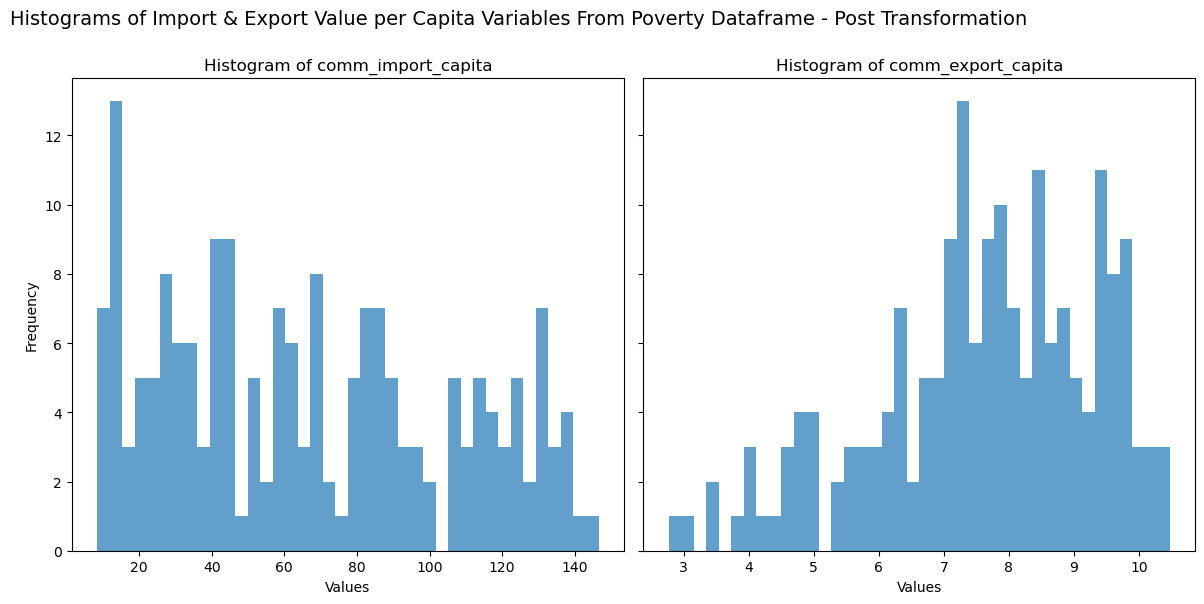

In [176]:
''' PLOTS OF TRADE RELATED FEATURE VARIABLES FROM GDP DATAFRAME - POST TRANSFORMATION'''
# Create a column of variables you want to graph
cols = ['comm_import_capita', 'comm_export_capita']

# Create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_gdp_2_transf[col], bins=40, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Histograms of Import & Export Value per Capita Variables From GDP Dataframe - Post Transformation', x=0, y=1, ha='left', fontsize=14)

# Ensure the layout fits well
plt.tight_layout()
plt.show()


''' PLOTS OF TRADE RELATED FEATURE VARIABLES FROM POVERTY DATAFRAME - POST TRANSFORMATION'''
# Create a column of variables you want to graph
cols = ['comm_import_capita', 'comm_export_capita']

# Create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_pov_2_transf[col], bins=40, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
# Add a main title
fig.suptitle('Histograms of Import & Export Value per Capita Variables From Poverty Dataframe - Post Transformation', x=0, y=1, ha='left', fontsize=14)

# Ensure the layout fits well
plt.tight_layout()
plt.show()


##### Export Tables for further analysis

In [178]:
df_pov_2.to_csv('df_pov_2.csv', index=False)
df_pov_2_continuous.to_csv('df_pov_2_continuous.csv', index=False)
df_pov_2_transf.to_csv('df_pov_2_transf.csv', index=False)

df_gdp_2.to_csv('df_gdp_2.csv', index=False)
df_gdp_2_continuous.to_csv('df_gdp_2_continuous.csv', index=False)
df_gdp_2_transf.to_csv('df_gdp_2_transf.csv', index=False)